In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.vision import *
import json
from PIL import *
from matplotlib import *
import matplotlib.cm as cmx
import matplotlib.colors as mcolors

In [3]:
PATH = untar_data(URLs.PASCAL_2007)
PATH.ls()

[PosixPath('/home/jupyter/.fastai/data/pascal_2007/test.json'),
 PosixPath('/home/jupyter/.fastai/data/pascal_2007/tmp'),
 PosixPath('/home/jupyter/.fastai/data/pascal_2007/test'),
 PosixPath('/home/jupyter/.fastai/data/pascal_2007/train.json'),
 PosixPath('/home/jupyter/.fastai/data/pascal_2007/valid.json'),
 PosixPath('/home/jupyter/.fastai/data/pascal_2007/train')]

In [4]:
trn_j = json.load((PATH/'train.json').open())
trn_j.keys()

dict_keys(['images', 'type', 'annotations', 'categories'])

In [5]:
IMAGES,ANNOTATIONS,CATEGORIES = ['images', 'annotations', 'categories']
trn_j[IMAGES][:5]

[{'file_name': '000012.jpg', 'height': 333, 'width': 500, 'id': 12},
 {'file_name': '000017.jpg', 'height': 364, 'width': 480, 'id': 17},
 {'file_name': '000023.jpg', 'height': 500, 'width': 334, 'id': 23},
 {'file_name': '000026.jpg', 'height': 333, 'width': 500, 'id': 26},
 {'file_name': '000032.jpg', 'height': 281, 'width': 500, 'id': 32}]

In [6]:
trn_j[ANNOTATIONS][:2]

[{'segmentation': [[155, 96, 155, 270, 351, 270, 351, 96]],
  'area': 34104,
  'iscrowd': 0,
  'image_id': 12,
  'bbox': [155, 96, 196, 174],
  'category_id': 7,
  'id': 1,
  'ignore': 0},
 {'segmentation': [[184, 61, 184, 199, 279, 199, 279, 61]],
  'area': 13110,
  'iscrowd': 0,
  'image_id': 17,
  'bbox': [184, 61, 95, 138],
  'category_id': 15,
  'id': 2,
  'ignore': 0}]

In [7]:
trn_j[CATEGORIES][:4]

[{'supercategory': 'none', 'id': 1, 'name': 'aeroplane'},
 {'supercategory': 'none', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'none', 'id': 3, 'name': 'bird'},
 {'supercategory': 'none', 'id': 4, 'name': 'boat'}]

In [8]:
FILE_NAME,ID,IMG_ID,CAT_ID,BBOX = 'file_name','id','image_id','category_id','bbox'

cats = {o[ID]:o['name'] for o in trn_j[CATEGORIES]}
trn_fns = {o[ID]:o[FILE_NAME] for o in trn_j[IMAGES]}
trn_ids = [o[ID] for o in trn_j[IMAGES]]

In [9]:
IMG_PATH = PATH/'train'
IMG_PATH

PosixPath('/home/jupyter/.fastai/data/pascal_2007/train')

In [10]:
JPEGS = get_image_files(IMG_PATH)

In [11]:
im0_d = trn_j[IMAGES][0]
im0_d[FILE_NAME],im0_d[ID]

('000012.jpg', 12)

In [12]:
def hw_bb(bb): return np.array([bb[1], bb[0], bb[3]+bb[1]-1, bb[2]+bb[0]-1])

trn_anno = defaultdict(lambda:[])
for o in trn_j[ANNOTATIONS]:
    if not o['ignore']:
        bb = o[BBOX]
        bb = hw_bb(bb)
        trn_anno[o[IMG_ID]].append((bb,o[CAT_ID]))
        
len(trn_anno)

2501

In [13]:
im_a = trn_anno[im0_d[ID]]; im_a

[(array([ 96, 155, 269, 350]), 7)]

In [14]:
im0_a = im_a[0]; im0_a

(array([ 96, 155, 269, 350]), 7)

In [15]:
cats[7]

'car'

In [16]:
trn_anno[17]

[(array([ 61, 184, 198, 278]), 15), (array([ 77,  89, 335, 402]), 13)]

In [17]:
cats[15],cats[13]

('person', 'horse')

In [18]:
bb_voc = [155, 96, 196, 174]
bb_fastai = hw_bb(bb_voc)

In [19]:
def bb_hw(a): return np.array([a[1],a[0],a[3]-a[1]+1,a[2]-a[0]+1])

In [20]:
f'expected: {bb_voc}, actual: {bb_hw(bb_fastai)}'

'expected: [155, 96, 196, 174], actual: [155  96 196 174]'

In [21]:
im = open_image(IMG_PATH/im0_d[FILE_NAME])

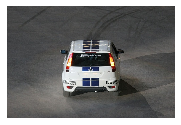

In [22]:
im.show()
# plt.imshow(image2np(im.data))

In [23]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    im.show(ax)
#     plt.imshow(image2np(im.data), ax)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax

In [24]:

def draw_outline(o, lw):
    o.set_path_effects([patheffects.Stroke(
        linewidth=lw, foreground='black'), patheffects.Normal()])

def draw_rect(ax, b, color='white'):
    patch = ax.add_patch(patches.Rectangle(b[:2], *b[-2:], fill=False, edgecolor=color, lw=2))
    draw_outline(patch, 4)

def draw_text(ax, xy, txt, sz=14, color='white'):
    text = ax.text(*xy, txt,
        verticalalignment='top', color=color, fontsize=sz, weight='bold')
    draw_outline(text, 1)

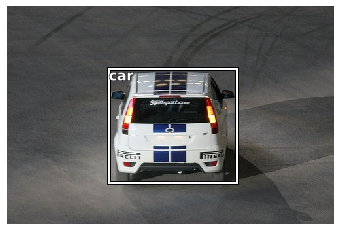

In [25]:
ax = show_img(im)
b = bb_hw(im0_a[0])
draw_rect(ax, b)
draw_text(ax, b[:2], cats[im0_a[1]])

In [26]:
def draw_im(im, ann):
    ax = show_img(im, figsize=(16,8))
    for b,c in ann:
        b = bb_hw(b)
        draw_rect(ax, b)
        draw_text(ax, b[:2], cats[c], sz=16)

In [27]:
def draw_idx(i):
    im_a = trn_anno[i]
    im = open_image(IMG_PATH/trn_fns[i])
    print(im.shape)
    draw_im(im, im_a)

torch.Size([3, 364, 480])


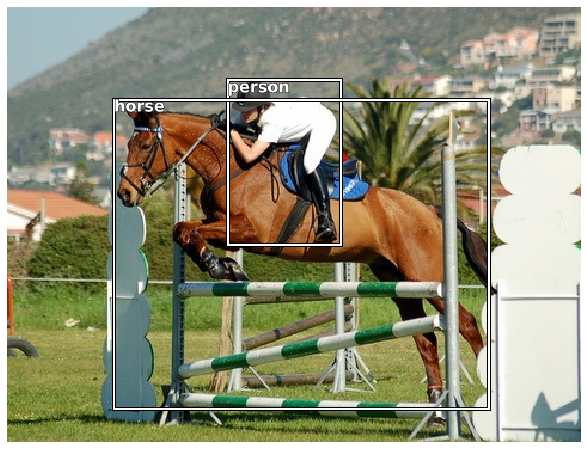

In [28]:
draw_idx(17)

## Largest Item Classifier

In [29]:
def get_lrg(b):
    if not b: raise Exception()
    b = sorted(b, key=lambda x: np.product(x[0][-2:]-x[0][:2]), reverse=True)
    return b[0]

In [30]:
trn_lrg_anno = {a: get_lrg(b) for a,b in trn_anno.items()}

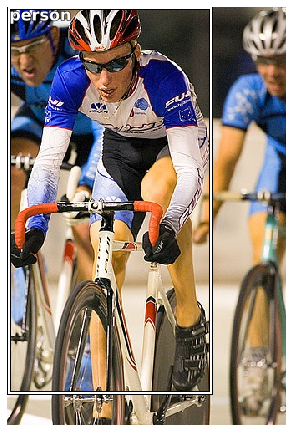

In [31]:
b,c = trn_lrg_anno[23]
b = bb_hw(b)
ax = show_img(open_image(IMG_PATH/trn_fns[23]), figsize=(5,10))
draw_rect(ax, b)
draw_text(ax, b[:2], cats[c], sz=16)

In [32]:
(PATH/'tmp').mkdir(exist_ok=True)
CSV = PATH/'tmp/lrg.csv'

In [33]:
df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids],
    'cat': [cats[trn_lrg_anno[o][1]] for o in trn_ids]}, columns=['fn','cat'])
df.to_csv(CSV, index=False)

In [34]:
df.head()

fn        cat
0  000012.jpg        car
1  000017.jpg      horse
2  000023.jpg     person
3  000026.jpg        car
4  000032.jpg  aeroplane

In [35]:
f_model = models.resnet34
sz=224
bs=64

In [36]:
tfms = get_transforms(max_warp=0., max_zoom=0.)
tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-10.0, 10.0)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True)],
 [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True)])

In [37]:

md = (ImageList.from_df(df, IMG_PATH) 
        .split_by_rand_pct()          
        .label_from_df()            
        .add_test_folder()          
        .transform(tfms, size=sz, resize_method=ResizeMethod.SQUISH)       
        .databunch(bs=bs))               

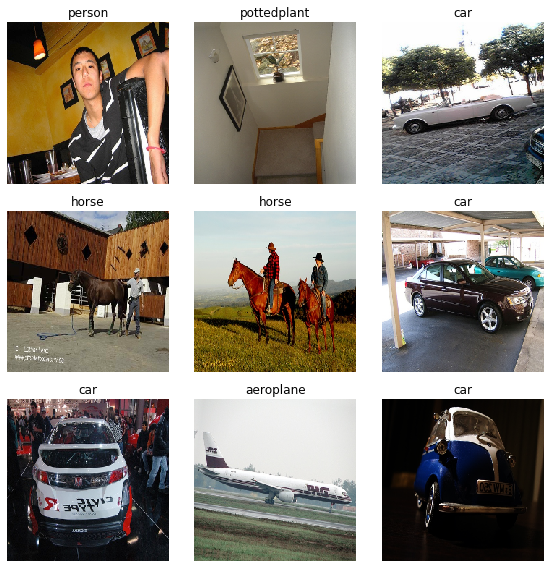

In [38]:
md.show_batch(rows=3, figsize=(8, 8))

In [39]:
learner = cnn_learner(md, models.resnet34, pretrained=True, wd=1e-1, 
                      metrics=[accuracy], callback_fns=[ShowGraph])

In [40]:
# learner.lr_find()
# learner.recorder.plot(suggestion=True)

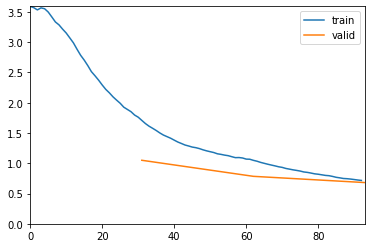

In [41]:
learner.fit_one_cycle(3, max_lr=6e-3)

In [42]:
learner.save('13a-object-detection-image-classification-1')

In [43]:
learner.load('13a-object-detection-image-classification-1');

In [44]:
learner.unfreeze()

In [45]:
# learner.lr_find()
# learner.recorder.plot(suggestion=True)

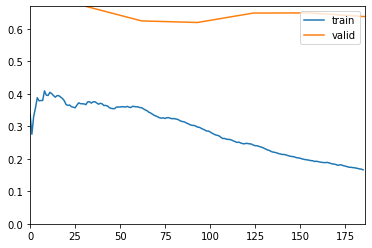

In [46]:
learner.fit_one_cycle(6, max_lr=slice(3e-6, 3e-4))

In [47]:
learner.save('13a-object-detection-image-classification-2')

In [48]:
learner.load('13a-object-detection-image-classification-2');

In [49]:
preds = learner.get_preds()

In [50]:
preds[0][0], preds[1][0]

(tensor([2.1627e-05, 7.3743e-01, 1.1566e-04, 1.0124e-04, 1.6703e-04, 2.3044e-05,
         1.0248e-04, 9.0376e-05, 2.7886e-04, 3.5553e-05, 5.1099e-04, 3.1031e-04,
         3.3591e-04, 1.8350e-04, 2.5982e-01, 1.8830e-04, 5.1288e-05, 5.6361e-05,
         7.3889e-05, 1.0942e-04]), tensor(1))

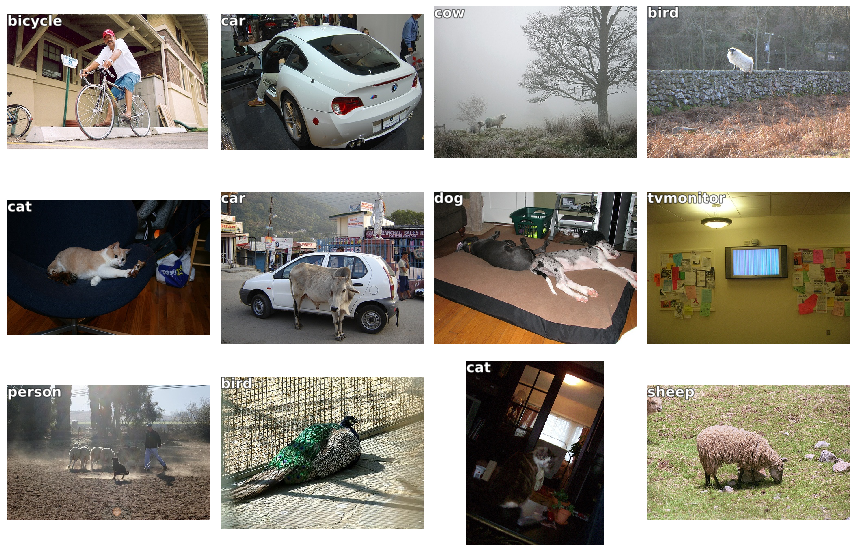

In [52]:
fig, axes = plt.subplots(3, 4, figsize=(12, 8))
for i,ax in enumerate(axes.flat):
    ima=learner.data.valid_ds.x[i]
    b = learner.data.classes[preds[0][i].argmax()]
    ax = show_img(ima, ax=ax)
    draw_text(ax, (0,0), b)
plt.tight_layout()

## Bounding Box Only

In [53]:
BB_CSV = PATH/'tmp/bb.csv'

In [54]:
bb = np.array([trn_lrg_anno[o][0] for o in trn_ids])
bbs = [' '.join(str(p) for p in o) for o in bb]

df = pd.DataFrame({'fn': [trn_fns[o] for o in trn_ids], 'bbox': bbs}, columns=['fn','bbox'])
df.to_csv(BB_CSV, index=False)

In [55]:
df.head()

fn            bbox
0  000012.jpg  96 155 269 350
1  000017.jpg   77 89 335 402
2  000023.jpg     1 2 461 242
3  000026.jpg  124 89 211 336
4  000032.jpg  77 103 182 374

In [56]:
sz=224
bs=64

In [57]:
tfms = get_transforms(max_rotate=0.3, max_warp=0., max_zoom=0.)
tfms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0, 1), 'col_pct': (0, 1), 'padding_mode': 'reflection'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-0.3, 0.3)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True)],
 [RandTransform(tfm=TfmCrop (crop_pad), kwargs={}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True)])

In [58]:
# ??PointsItemList

In [271]:
df.head()

fn            bbox
0  000012.jpg  96 155 269 350
1  000017.jpg   77 89 335 402
2  000023.jpg     1 2 461 242
3  000026.jpg  124 89 211 336
4  000032.jpg  77 103 182 374

In [99]:
# df[df.fn == '000023.jpg'].bbox.str.split().to_numpy()[0]
# bbox = df[df.fn == '009918.jpg'].bbox.str.split().to_numpy()[0]
# bbox = [float(i) for i in bbox]
# bbox

In [290]:
def get_bbox(f):    
#     print(f)    
    filename = f.split(os.path.sep)[-1]
#     print(filename)
    bboxes = df[df.fn == filename]['bbox'].str.split().to_numpy()[0]
    bboxes = [float(i) for i in bboxes]
#     print(bboxes)
    return [[[*bboxes]], ['car']]
  


In [291]:
# images, lbl_bbox = get_annotations(coco/'annotations/train_sample.json')
# img2bbox = dict(zip(images, lbl_bbox))
get_y_func = lambda o:get_bbox(o)

In [292]:
y = get_y_func('/home/jupyter/.fastai/data/pascal_2007/train/000012.jpg')
y

[[[96.0, 155.0, 269.0, 350.0]], ['car']]

databunch

In [293]:
# md = ImageClassifierData.from_csv(PATH, JPEGS, BB_CSV, tfms=tfms, continuous=True, bs=4)
md = ObjectItemList.from_df(df, IMG_PATH)
md

ObjectItemList (2501 items)
Image (3, 333, 500),Image (3, 364, 480),Image (3, 500, 334),Image (3, 333, 500),Image (3, 281, 500)
Path: /home/jupyter/.fastai/data/pascal_2007/train

In [294]:
md.items[0]

'/home/jupyter/.fastai/data/pascal_2007/train/000012.jpg'

In [295]:
md = md.split_by_rand_pct()
md

ItemLists;

Train: ObjectItemList (2001 items)
Image (3, 333, 500),Image (3, 364, 480),Image (3, 333, 500),Image (3, 281, 500),Image (3, 366, 500)
Path: /home/jupyter/.fastai/data/pascal_2007/train;

Valid: ObjectItemList (500 items)
Image (3, 375, 500),Image (3, 375, 500),Image (3, 333, 500),Image (3, 375, 500),Image (3, 500, 333)
Path: /home/jupyter/.fastai/data/pascal_2007/train;

Test: None

In [296]:
md = md.label_from_func(get_y_func)
md

LabelLists;

Train: LabelList (2001 items)
x: ObjectItemList
Image (3, 333, 500),Image (3, 364, 480),Image (3, 333, 500),Image (3, 281, 500),Image (3, 366, 500)
y: ObjectCategoryList
ImageBBox (333, 500),ImageBBox (364, 480),ImageBBox (333, 500),ImageBBox (281, 500),ImageBBox (366, 500)
Path: /home/jupyter/.fastai/data/pascal_2007/train;

Valid: LabelList (500 items)
x: ObjectItemList
Image (3, 375, 500),Image (3, 375, 500),Image (3, 333, 500),Image (3, 375, 500),Image (3, 500, 333)
y: ObjectCategoryList
ImageBBox (375, 500),ImageBBox (375, 500),ImageBBox (333, 500),ImageBBox (375, 500),ImageBBox (500, 333)
Path: /home/jupyter/.fastai/data/pascal_2007/train;

Test: None

In [297]:
md = md.transform(tfms, tfm_y=True, size=sz)
md

LabelLists;

Train: LabelList (2001 items)
x: ObjectItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: ObjectCategoryList
ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224)
Path: /home/jupyter/.fastai/data/pascal_2007/train;

Valid: LabelList (500 items)
x: ObjectItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: ObjectCategoryList
ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224)
Path: /home/jupyter/.fastai/data/pascal_2007/train;

Test: None

In [298]:
md = md.databunch(bs=bs).normalize(imagenet_stats)
md

ImageDataBunch;

Train: LabelList (2001 items)
x: ObjectItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: ObjectCategoryList
ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224)
Path: /home/jupyter/.fastai/data/pascal_2007/train;

Valid: LabelList (500 items)
x: ObjectItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: ObjectCategoryList
ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224),ImageBBox (224, 224)
Path: /home/jupyter/.fastai/data/pascal_2007/train;

Test: None

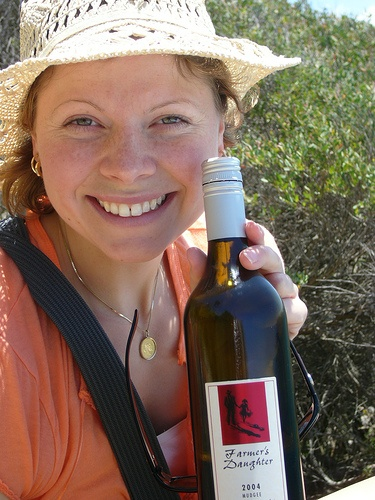

In [299]:
md.valid_ds.x[5]

In [300]:
md.valid_ds.y[5].data[0]

tensor([[-1.0000, -1.0000,  0.9960,  0.6267]])

In [330]:
md.valid_dl

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f88443ca208>, device=device(type='cuda', index=0), tfms=[functools.partial(<function _normalize_batch at 0x7f88d0aa3268>, mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]), do_x=True, do_y=False)], collate_fn=<function data_collate at 0x7f8879ef7950>)

[-0.463643  0.344     1.405786  1.4     ]
[-0.848071 -0.306667  1.848946  1.634667]
[-0.534     0.063063  2.152     1.552553]
[-0.356857 -0.477333  1.635375  1.778667]
[ 0.57958 -0.216    1.33033  1.498  ]
[-1.       -1.        2.626667  3.      ]
[ 0.180214 -0.124224  1.783     1.658385]
[-0.15     -0.063063  1.33      1.24024 ]
[-0.282107 -0.034667  1.197554  1.362667]


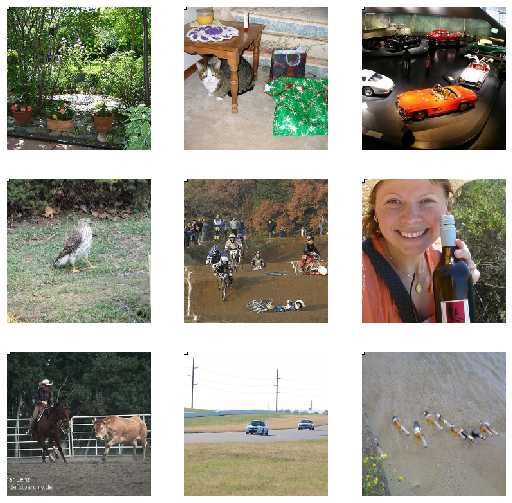

In [325]:

fig,axes = plt.subplots(3,3, figsize=(9,9))
for i,ax in enumerate(axes.flat):
    x,y=md.valid_ds[i]
    ima=x 
    print(x)
#     print(y)
    b = bb_hw(y.data[0][0])
#     b = y.data[0][0]
    print(b)
    show_img(ima, ax=ax)
    draw_rect(ax, b)
#     draw_rect(ax, [20, 20, 100, 100])